# READ DATASET & PRINT DATA TABLE

In [1]:
import pandas as pd
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

dataFrame = pd.read_csv('heart_2020_cleaned.csv', sep=',')
label = 'HeartDisease'
feature_names = dataFrame.columns

#dataFrame.head()
dataFrame.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


# DIMENSIONS (#rows, #cols)

In [2]:
shape = dataFrame.shape
print(f'Tupel: #{shape[0]} Features: #{shape[1]}')

Tupel: #319795 Features: #18


# DATA DISTRIBUTION (based on label)
## Histogram

<AxesSubplot:>

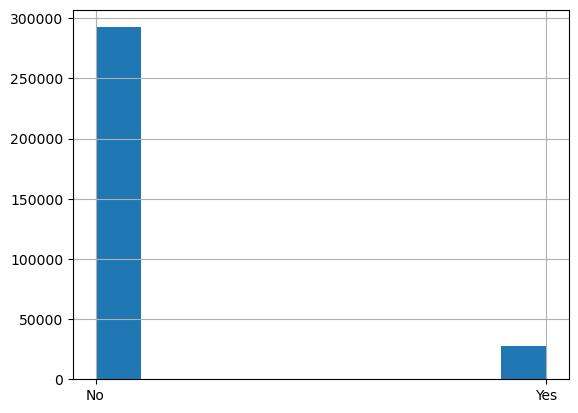

In [3]:
%matplotlib inline
dataFrame[label].hist(bins=10)

## In Numbers

In [4]:
dataFrame[label].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

## Pairplot
**Detailed distribution of the features in the dataset. TIME CONSUMING**

In [5]:
sns.pairplot(data=dataFrame, hue=label)
plt.show()

KeyboardInterrupt: 

# DATA QUALITY CHECK
## Empty Data (None, numpy.NaN, '', numpy.inf)

**checking if there is corrupt data in a column!** 

> example:   
> feature1 0 => means no nullable data found for feature1 </br>
> feature2 5 => means 5 cells were null! -> get rid of them
            
isnull(): _"Return a boolean same-sized object indicating if the values are NA. NA values, such as None or numpy.NaN, gets mapped to True values. Everything else gets mapped to False values. Characters such as empty strings '' or numpy.inf are not considered NA values (unless you set pandas.options.mode.use_inf_as_na = True)." ~ Documentation_


In [6]:
pd.options.mode.use_inf_as_na = True
dataFrame.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

## Zero Values

**doesn't always need to be a bad sign!**

GOOD: GivenBirths:0 // is OK, a woman doesn't need to give birth

BAD: Age:0 // is not OK when recording patients who died from dementia

In [7]:
# Display how many 0 value each feature has
for field in dataFrame.columns:
    print('Number of 0-entries for "{field_name}" feature: {amount}'.format(
        field_name=field,
        amount=np.count_nonzero(dataFrame[field] == 0)
    ))

Number of 0-entries for "HeartDisease" feature: 0
Number of 0-entries for "BMI" feature: 0
Number of 0-entries for "Smoking" feature: 0
Number of 0-entries for "AlcoholDrinking" feature: 0
Number of 0-entries for "Stroke" feature: 0
Number of 0-entries for "PhysicalHealth" feature: 226589
Number of 0-entries for "MentalHealth" feature: 205401
Number of 0-entries for "DiffWalking" feature: 0
Number of 0-entries for "Sex" feature: 0
Number of 0-entries for "AgeCategory" feature: 0
Number of 0-entries for "Race" feature: 0
Number of 0-entries for "Diabetic" feature: 0
Number of 0-entries for "PhysicalActivity" feature: 0
Number of 0-entries for "GenHealth" feature: 0
Number of 0-entries for "SleepTime" feature: 0
Number of 0-entries for "Asthma" feature: 0
Number of 0-entries for "KidneyDisease" feature: 0
Number of 0-entries for "SkinCancer" feature: 0


# Correlation Matrix

A matrix of correlations provides useful insight into relationships between pairs of variables.

**NOTE: not all columns will probably be visible, only the numeric ones**

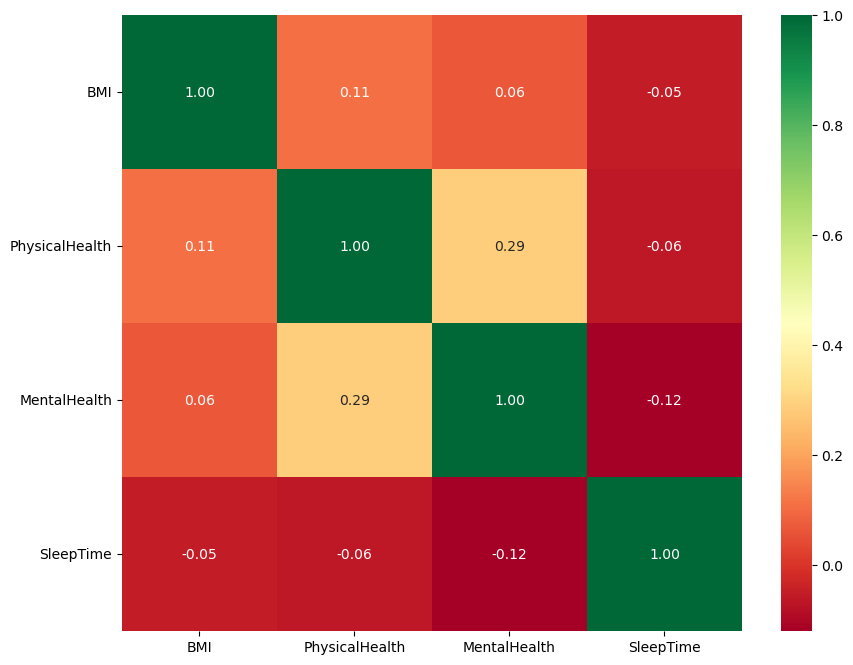

In [8]:
feature_names = dataFrame.columns
X = dataFrame[feature_names]
y = dataFrame[label]

sns.heatmap(
    data=X.corr(),
    annot=True,
    fmt='.2f',
    cmap='RdYlGn'
)

fig = plt.gcf()
fig.set_size_inches(10, 8)

plt.show()